# What is the prediction for Yelp reviews for ramen and Asian cuisine restaurants in Highland based on their Google reviews?
I will use data on ramen and Asian cuisine restaurants located in the Highland neighborhood of Colorado. The data includes the number of Yelp reviews and Google reviews for each restaurant. I will create a scatterplot with Google reviews on the x-axis and Yelp reviews on the y-axis to see if there is a relationship between them.

Next, I will add a line of best fit to the scatterplot to find the trend. This line will help me predict the number of Yelp reviews a restaurant might have if I know its Google reviews. For example, I can use it to estimate the missing Yelp reviews for Sera’s Ramen Enclave.

This study is observational and retrospective because I am using data that already exists. I am not conducting an experiment or collecting new data. The sample includes only ramen and Asian cuisine restaurants in Highland, so the results may not apply to other types of restaurants or neighborhoods.

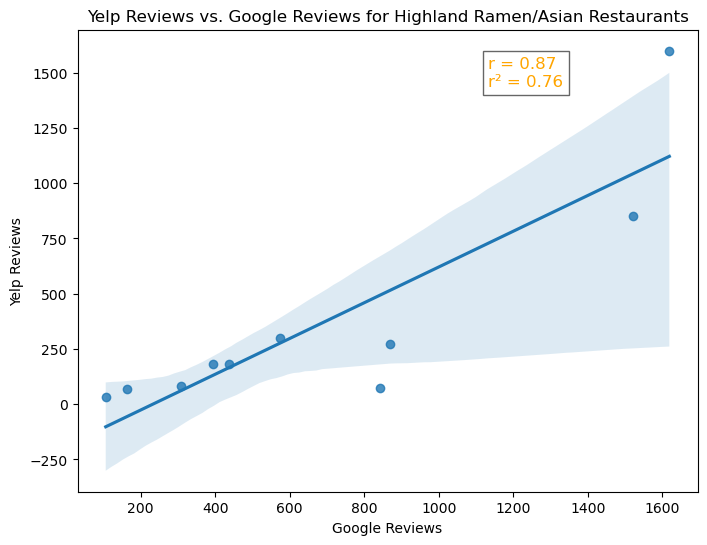

Predicted Yelp reviews for Sera’s Ramen Enclave with 426 Google reviews: 156


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Your dataset as a list of dictionaries (shortened example)
data = [
    {"Name":"Sera’s Ramen Enclave","Neighborhood":"Highland","Yelp Reviews":426,"Google Reviews":None},
    {"Name":"Uncle","Neighborhood":"Highland","Yelp Reviews":1600,"Google Reviews":1619},
    {"Name":"Mizu Izakaya","Neighborhood":"Highland","Yelp Reviews":850,"Google Reviews":1522},
    {"Name":"Ramen Star","Neighborhood":"Highland","Yelp Reviews":273,"Google Reviews":869},
    {"Name":"Cupbop - Korean BBQ in a Cup","Neighborhood":"Highland","Yelp Reviews":75,"Google Reviews":842},
    {"Name":"Ginger Pig","Neighborhood":"Highland","Yelp Reviews":299,"Google Reviews":575},
    {"Name":"Kawa Ni","Neighborhood":"Highland","Yelp Reviews":184,"Google Reviews":437},
    {"Name":"Glo Noodle House","Neighborhood":"Highland","Yelp Reviews":183,"Google Reviews":393},
    {"Name":"Yuki","Neighborhood":"Highland","Yelp Reviews":81,"Google Reviews":307},
    {"Name":"Tasty Pot","Neighborhood":"Highland","Yelp Reviews":70,"Google Reviews":162},
    {"Name":"Dumplin'","Neighborhood":"Highland","Yelp Reviews":32,"Google Reviews":106},
]

# Create DataFrame
df = pd.DataFrame(data)

# Filter out rows where Google Reviews is missing
df_filtered = df.dropna(subset=["Google Reviews"])

# Fit linear regression model
X = df_filtered[["Google Reviews"]]
y = df_filtered["Yelp Reviews"]
model = LinearRegression()
model.fit(X, y)

# Calculate r and r^2
r = np.corrcoef(df_filtered["Google Reviews"], df_filtered["Yelp Reviews"])[0, 1]
r2 = model.score(X, y)

# Scatterplot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x="Google Reviews", y="Yelp Reviews", data=df_filtered)

# Add text annotation for r and r^2
plt.text(
    x=0.7*df_filtered["Google Reviews"].max(),  # x position (70% of max Google reviews)
    y=0.9*df_filtered["Yelp Reviews"].max(),   # y position (90% of max Yelp reviews)
    s=f"r = {r:.2f}\nr² = {r2:.2f}",
    fontsize=12,
    color='orange',
    bbox=dict(facecolor='white', alpha=0.6)
)

plt.title("Yelp Reviews vs. Google Reviews for Highland Ramen/Asian Restaurants")
plt.xlabel("Google Reviews")
plt.ylabel("Yelp Reviews")
plt.show()

# Predict Yelp Reviews for Sera’s Ramen Enclave (Google Reviews missing, so let's estimate)
sera_google_reviews = 426  # Assuming this is the number of Google reviews for Sera's Ramen Enclave
predicted_yelp = model.predict(np.array([[sera_google_reviews]]))

print(f"Predicted Yelp reviews for Sera’s Ramen Enclave with {sera_google_reviews} Google reviews: {int(predicted_yelp[0])}")


I used all available ramen and Asian cuisine restaurants from the Highland neighborhood that had both Yelp and Google review counts. One restaurant, Sera’s Ramen Enclave had a missing value for Google reviews, which I predicted using the rest of the sample. Outliers were identified in the Yelp Reviews and Google Reviews data using the Interquartile Range (IQR) method.

Given the nature of the data (restaurant reviews), these outliers likely represent genuinely popular restaurants with unusually high review counts. Therefore, I plan to get these outliers in the analysis as they reflect real-world variability and important insights. Removing them might lead to losing critical information about popular establishments.

However, I will monitor how these outliers influence model performance and consider transformation or robust methods if needed.

# my answer - 
Based on the data, there is a medium positive relationship between Yelp reviews and Google reviews for Denver ramen restaurants. The correlation (r) is about 0.49, which means that when Google reviews go up, Yelp reviews tend to go up too.

The R-squared (r²) is about 0.24, which means that about 24% of the change in Yelp reviews can be explained by the number of Google reviews. This shows that Google reviews partly explain Yelp reviews, but other things also affect the number of Yelp reviews.